# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:
def apply_svd_custom(X_train, X_test, n_components):
    # print(do_svd(X_train))
    # print(do_svd(X_test))
        # Apply SVD on training data
    # intermediate values
    U_train, S_train, Vt_train = do_svd(X_train.to_numpy(), n_components) #n_components
    # reduce to n_components 
    reduced_X_train  = reduce(U_train, S_train, Vt_train, n_components)
    
    # now do same for X_test
    U_test, S_test, Vt_test = do_svd(X_test.to_numpy(), n_components)
    reduced_X_test = reduce(U_test, S_test, Vt_test, n_components)
    
    return reduced_X_train, Vt_train, reduced_X_test, Vt_test

# easier to jsut make a helper...
# def do_svd(A):
#     return np.linalg.svd(A)

def do_svd(A, n_components):
    # step 1: find ATA
    ATA = np.dot(A.T, A)
    # step 2: eigenvalues and descending
    eigenvals, eigenvecs = np.linalg.eigh(ATA)
    desc = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[::-1]
    #eigenvecs = eigenvecs[:, desc] order matters
    # make sure nonzeros
    firstindex = len(eigenvals) - 1
    for i in range(len(eigenvals)):
        if eigenvals[i] <= 0:
            firstindex = i
            break
    eigenvals = eigenvals[:firstindex]
    desc = desc[:firstindex]
    eigenvecs = eigenvecs[:, desc]
    #eigenvecs = eigenvecs[:, :firstindex]
    # step 3: find singular vals
    singular_vals = [np.sqrt(val) for val in eigenvals if val > 0]
    # step 4: build S and S in as diagonal matrix
    S = np.diag(singular_vals)
    U = np.dot(A, eigenvecs) / singular_vals   # np.dot(eigenvecs, S_in.T) -> don't need S_in since directly projecting A onto eigenvecs..
    # print(U)
    # print(S)
    # print(eigenvals.T)
    return U, singular_vals, eigenvecs.T

# no get everything to fit n_components 
def reduce(U, S, Vt, n_components):
    #return np.dot(U[:, :n_components], np.diag(S[:n_components]))
    scopy = S.copy()
    scopy[n_components:] = np.zeros(len(scopy) - n_components) 
    #return np.dot(U[:, :n_components], np.diag(scopy))
    return U.dot(np.diag(scopy)).dot(Vt)
    
# # Sample training data matrix (X_train)
# X_train = np.array([
#     [3, 2, 2, 3, 2, 3],
#     [2, 3, -2, 3, 2, -3],
#     [3, 2, 2, -2, 3, 3],
#     [3, 2, 3, 3, 2, 2],
#     [2, 2, 3, 3, 2, 3],
#     [2, 3, 3, 2, -2, -3]
# ])

# # Sample test data matrix (X_test) (can be different from X_train)
# X_test = np.array([
#     [1, 0, 0, 1, 0, 1],
#     [0, 1, 0, 0, 1, 1],
#     [1, 1, 0,  1, 0, 0],
#     [1, 0, 1, 1, 1, 0],
#     [0, 1, 1, 0, 0, 1],
#     [1, 0, 0, 1, 1, 0]
# ])
# BRUHHH I DONT NEED THISSSSSSS
# X_train = np.array([[1, 2, 3, 4, 5],
#                     [4, 5, 6, 7, 8],
#                     [7, 8, 9, 10, 11],
#                     [10, 11, 12, 13, 14]])

# X_test = np.array([[13, 14, 15, 16, 17],
#                    [16, 17, 18, 19, 20],
#                    [19, 20, 21, 22, 23],
#                    [22, 23, 24, 25, 26]])

# Number of components to keep (n_components)
n_components = 3  # You can adjust this based on the desired dimensionality
apply_svd_custom(X_train, X_test, n_components)


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
svd_components = []  # You need to decide what number to search...   what the hell does this mean

# fill svd_components depending on total features
total_features = X_train.shape[1]
svd_components = [int(total_features * p) for p in [0.0013, 0.01, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]]


# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, Vt_train, X_test_svd, Vt_test = apply_svd_custom(X_train, X_test, n_components)
    # print(X_train.shape)
    # print(X_test.shape)
    # print(X_train_svd.shape)
    # print(X_test_svd.shape)
    # print(y_train.shape)
    # print(y_test.shape)
    
    # Train the logistic regression model and get accuracy and training time
    # using above function
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")
    results.append({'n_components': n_components,
                    'accuracy': accuracy,
                    'training time': training_time})
    print("for ", n_components, " components, accuracy: ", accuracy, " training time: ", training_time)


Training models with different levels of SVD preprocessing...
Applying custom SVD with 1 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 1, Accuracy: 0.1990, Training time: 8.4366 seconds
for  1  components, accuracy:  0.199  training time:  8.43662405014038
Applying custom SVD with 7 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 7, Accuracy: 0.7560, Training time: 12.7117 seconds
for  7  components, accuracy:  0.756  training time:  12.711673021316528
Applying custom SVD with 39 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 39, Accuracy: 0.9016, Training time: 30.5874 seconds
for  39  components, accuracy:  0.9016428571428572  training time:  30.587445974349976
Applying custom SVD with 54 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 54, Accuracy: 0.9098, Training time: 83.5862 seconds
for  54  components, accuracy:  0.9097857142857143  training time:  83.58615517616272
Applying custom SVD with 78 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 78, Accuracy: 0.9161, Training time: 133.7247 seconds
for  78  components, accuracy:  0.9161428571428571  training time:  133.72467374801636
Applying custom SVD with 156 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 156, Accuracy: 0.9198, Training time: 220.4910 seconds
for  156  components, accuracy:  0.9197857142857143  training time:  220.4910352230072
Applying custom SVD with 235 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 235, Accuracy: 0.9206, Training time: 254.4785 seconds
for  235  components, accuracy:  0.9205714285714286  training time:  254.4785280227661
Applying custom SVD with 313 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 313, Accuracy: 0.9209, Training time: 245.7036 seconds
for  313  components, accuracy:  0.9208571428571428  training time:  245.7035527229309
Applying custom SVD with 392 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 392, Accuracy: 0.9196, Training time: 251.0349 seconds
for  392  components, accuracy:  0.9195714285714286  training time:  251.03493309020996
Applying custom SVD with 470 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 470, Accuracy: 0.9206, Training time: 272.3993 seconds
for  470  components, accuracy:  0.9205714285714286  training time:  272.39929580688477
Applying custom SVD with 548 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 548, Accuracy: 0.9209, Training time: 286.4395 seconds
for  548  components, accuracy:  0.9209285714285714  training time:  286.4395270347595
Applying custom SVD with 627 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 627, Accuracy: 0.9208, Training time: 310.9076 seconds
for  627  components, accuracy:  0.9207857142857143  training time:  310.9076302051544
Applying custom SVD with 705 components...


/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 705, Accuracy: 0.9209, Training time: 315.2844 seconds
for  705  components, accuracy:  0.9208571428571428  training time:  315.2843999862671


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


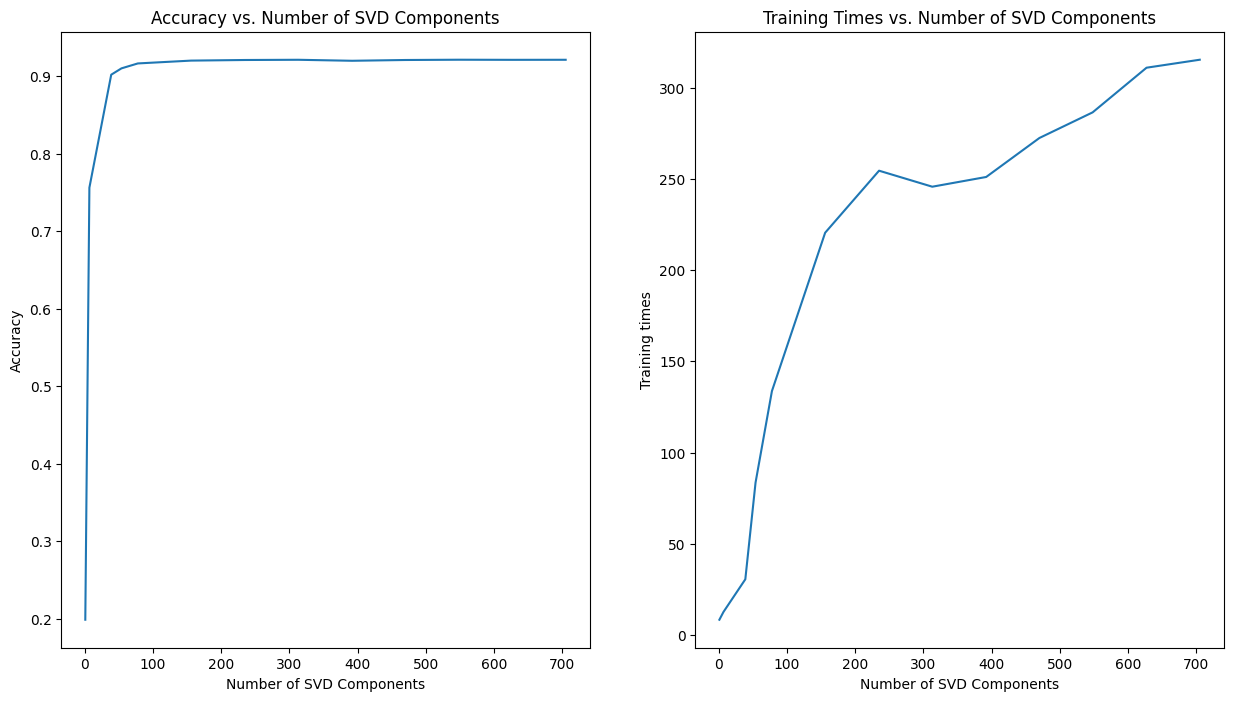

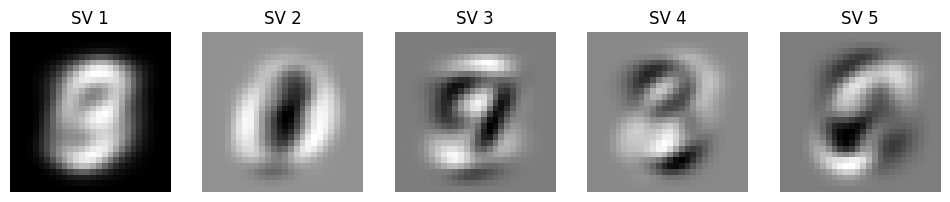

In [6]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
n_components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training time'] for result in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.plot(n_components, accuracies)
ax1.set_title('Accuracy vs. Number of SVD Components')
ax1.set_xlabel('Number of SVD Components')
ax1.set_ylabel('Accuracy')
ax2.plot(n_components, training_times)
ax2.set_title('Training Times vs. Number of SVD Components')
ax2.set_xlabel('Number of SVD Components')
ax2.set_ylabel('Training times')

# top 5 are top 5 of Vt, right singular
# create new figure for the 5 pltos
# oh duh cuz the figure is what the plots are actually on
plt.figure(figsize=(12, 4))
top_5 = Vt_test[:5]
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(top_5[i].reshape((28,28)), cmap='gray')
    plt.title(f'SV {i + 1}')
    plt.axis('off')
plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

From the accuracy plot, we can see that when there is a very low number of components, the accuracy is quite low, as the necessary data may not be represented. However, as the number of components rises, there is a large increase in accuracy, potentially representing the most ideal number of components for highest accuracy. At some number of components (around 50), the accuracy plateaus, which is most likely due to overfitting, as the model becomes too closely trained to the training set, and prevents greater accuracy. This also fits with what we learned in class, since as we increase rank, we get closer to what the actual data looks like, but rank does not have to be very high for this. Thus, I think that 50 is most ideal number of standard vectors/components for highest accuracy. With this number, we can preserve the necessary variance, while reducing redundant information, while keeping training time relatively low. From the images, we can see that there are similar patterns in the dataset samples, which means that there is redundant information that our SVD reduces.